In [61]:
import numpy as np
import matplotlib.pyplot as plt
from AWG_function import *

In [113]:
inst=connect_PXI()

Load TEProteus.dll from : C:\Windows\system32\TEProteus.dll
connected to: slot#: 8,


In [114]:
carrier_frequency=100E6
configurate_one_DAC(inst=inst,channel=1,carrier_frequency=carrier_frequency,trigger_channel=1)
pulse_1ns=segment(inst=inst,segnum=1)
pulse_1ns.default_pulse(length=480+32+64+1232+16,amplitude=0.5,phase=0,type='sine')
pulse_1ns.compile_and_download_segment()

empty = segment(inst=inst, segnum=2)
empty.default_pulse(length=480+432, amplitude=0.5, phase=0, type='empty')
empty.compile_and_download_segment()

ch1_task=task_table(inst=inst,length=3)
ch1_task.new_task(tasknum=1,segnum=1,ext_trigger_ch=1,digitizer_trigger=False,next_task=2)
ch1_task.new_task(tasknum=2,segnum=2,ext_trigger_ch=0,digitizer_trigger=True,next_task=3)
ch1_task.new_task(tasknum=3,segnum=1,ext_trigger_ch=0,digitizer_trigger=False,next_task=1)
ch1_task.download_task_table()

DAC sample rate 1.00GS/s, SCLK 8.00GS/s
DAC minimum segment length 32.0ns, segment granularity 16.0ns
DAC configuration successful
channel 1, segment 1 downloaded, length 1824.0ns
channel 1, segment 2 downloaded, length 912.0ns
channel 1 task table downloaded


In [115]:
ch1_digitizer=digitizer(address={'inst':inst,'channel':1},task_trigger_channel=1,carrier_frequency=carrier_frequency,numframes=1,framelen_IQ=4800+432)

digitizer sample rate 0.12GS/s, SCLK 2.00GS/s
digitizer granularity 384.0ns
Channel 1 acquisition frame Length 41856.0 ns, frame number 1


In [10]:
print(ch1_digitizer.inquire_acquisition())

(0, 0)


In [116]:
ch1_digitizer.read_digitizer_data()

Total read size in bytes: 41856
acquired 5232 complex points, 5232.0ns


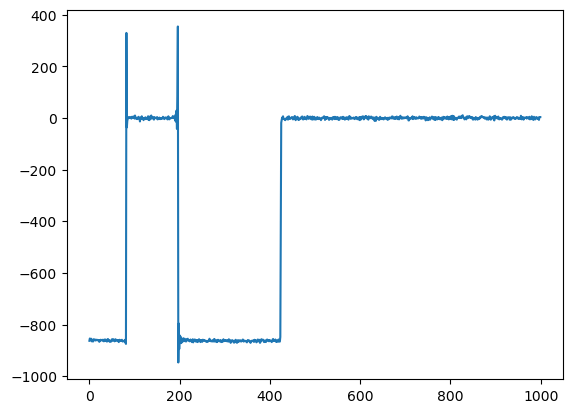

In [117]:
plt.plot(ch1_digitizer.wavI[0:1000])

In [58]:
I_1=ch1_digitizer.wavI
Q_1 = ch1_digitizer.wavQ

In [85]:
I_2=ch1_digitizer.wavI
Q_2 = ch1_digitizer.wavQ

In [77]:
I_3=ch1_digitizer.wavI
Q_3 = ch1_digitizer.wavQ

In [97]:
I_4=ch1_digitizer.wavI
Q_4 = ch1_digitizer.wavQ

In [105]:
I_5=ch1_digitizer.wavI
Q_5 = ch1_digitizer.wavQ

In [118]:
I_6=ch1_digitizer.wavI
Q_6 = ch1_digitizer.wavQ

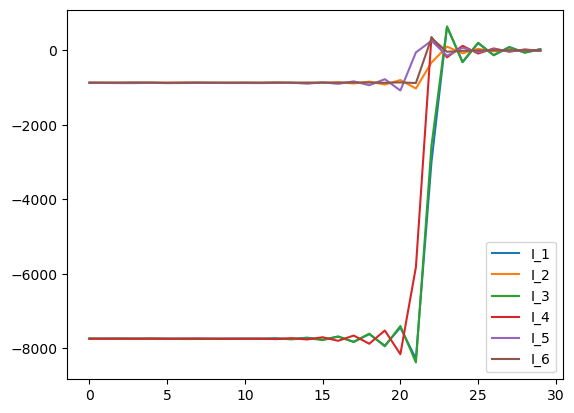

In [121]:
plt.plot(I_1[60:90],label='I_1')
plt.plot(I_2[60:90],label='I_2')
plt.plot(I_3[60:90],label='I_3')
plt.plot(I_4[60:90],label='I_4')
plt.plot(I_5[60:90],label='I_5')
plt.plot(I_6[60:90],label='I_6')
plt.legend()


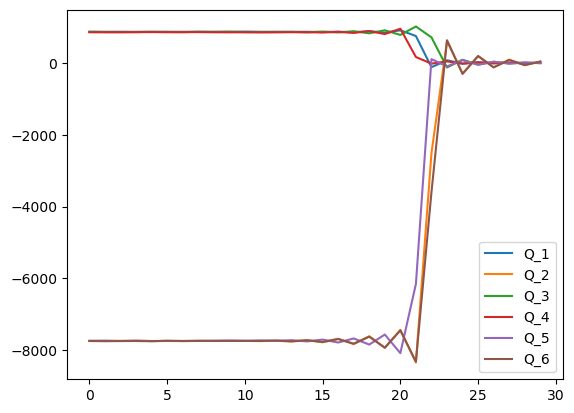

In [122]:
plt.plot(Q_1[60:90],label='Q_1')
plt.plot(Q_2[60:90],label='Q_2')
plt.plot(Q_3[60:90],label='Q_3')
plt.plot(Q_4[60:90],label='Q_4')
plt.plot(Q_5[60:90],label='Q_5')
plt.plot(Q_6[60:90],label='Q_6')
plt.legend()